In [1]:
import cv2
import matplotlib.pyplot as plt

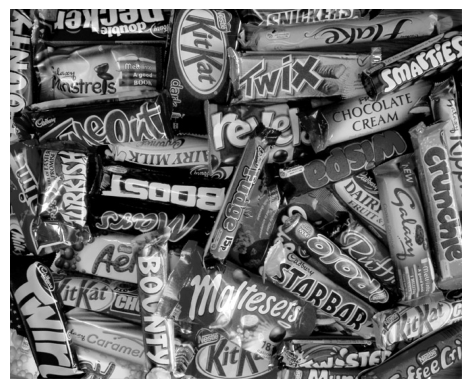

In [2]:
chos = cv2.imread("data/chocolates.jpg", 0)

plt.figure(), plt.imshow(chos, cmap="gray"), plt.axis("off");

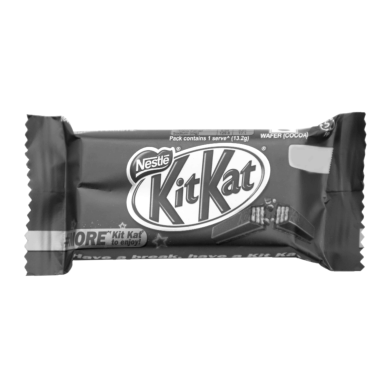

In [3]:
cho = cv2.imread("data/nestle.jpg", 0)

plt.figure(), plt.imshow(cho, cmap="gray"), plt.axis("off");

# ORB Detector

##### Features like Edge, Corner etc. of object

In [4]:
orb = cv2.ORB_create()

# key point detect | (des = descriptors)
kp1, des1 = orb.detectAndCompute(cho, None)
kp2, des2 = orb.detectAndCompute(chos, None)

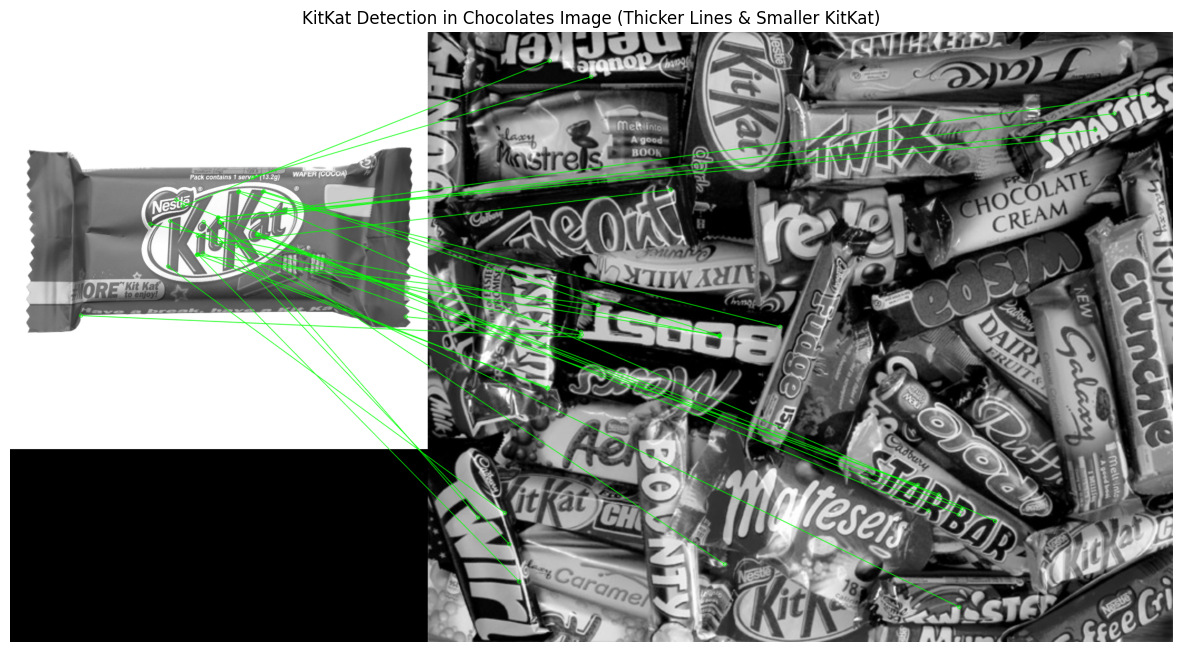

In [14]:
import cv2
import matplotlib.pyplot as plt

# Load images
kitkat = cv2.imread("data/nestle.jpg", cv2.IMREAD_GRAYSCALE)  # KitKat image (object to find)
chocolates = cv2.imread("data/chocolates.jpg", cv2.IMREAD_GRAYSCALE)  # Scene with multiple chocolates

# Resize chocolates image to be significantly larger (if needed)
scale_percent = 200  # Increase chocolates image size
width = int(chocolates.shape[1] * scale_percent / 100)
height = int(chocolates.shape[0] * scale_percent / 100)
chocolates = cv2.resize(chocolates, (width, height))  # Make chocolates image larger

# Resize KitKat image to be smaller (so it fits correctly)
kitkat_scale_percent = 30  # Reduce KitKat image size (adjust as needed)
kitkat_width = int(kitkat.shape[1] * kitkat_scale_percent / 100)
kitkat_height = int(kitkat.shape[0] * kitkat_scale_percent / 100)
kitkat = cv2.resize(kitkat, (kitkat_width, kitkat_height))  # Make KitKat image much smaller

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
kp1, des1 = orb.detectAndCompute(kitkat, None)  # KitKat image (object)
kp2, des2 = orb.detectAndCompute(chocolates, None)  # Chocolates image (scene)

# Initialize BFMatcher (Brute-Force Matcher with Hamming distance)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match keypoints between images
matches = bf.match(des1, des2)

# Sort matches by distance (lower distance = better match)
matches = sorted(matches, key=lambda x: x.distance)

# Make match lines much thicker and clearer
img_match = cv2.drawMatches(
    kitkat, kp1, chocolates, kp2, matches[:30], None, 
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,  # Keeps only matched keypoints
    matchColor=(0, 255, 0),  # Green lines for matches
    singlePointColor=(255, 0, 0)  # Red dots for keypoints
)

# Display the result
plt.figure(figsize=(15, 10))  # Adjust figure size for better visibility
plt.title("KitKat Detection in Chocolates Image (Thicker Lines & Smaller KitKat)")
plt.imshow(img_match), plt.axis("off")
plt.show()


# Brute-Force Matcher

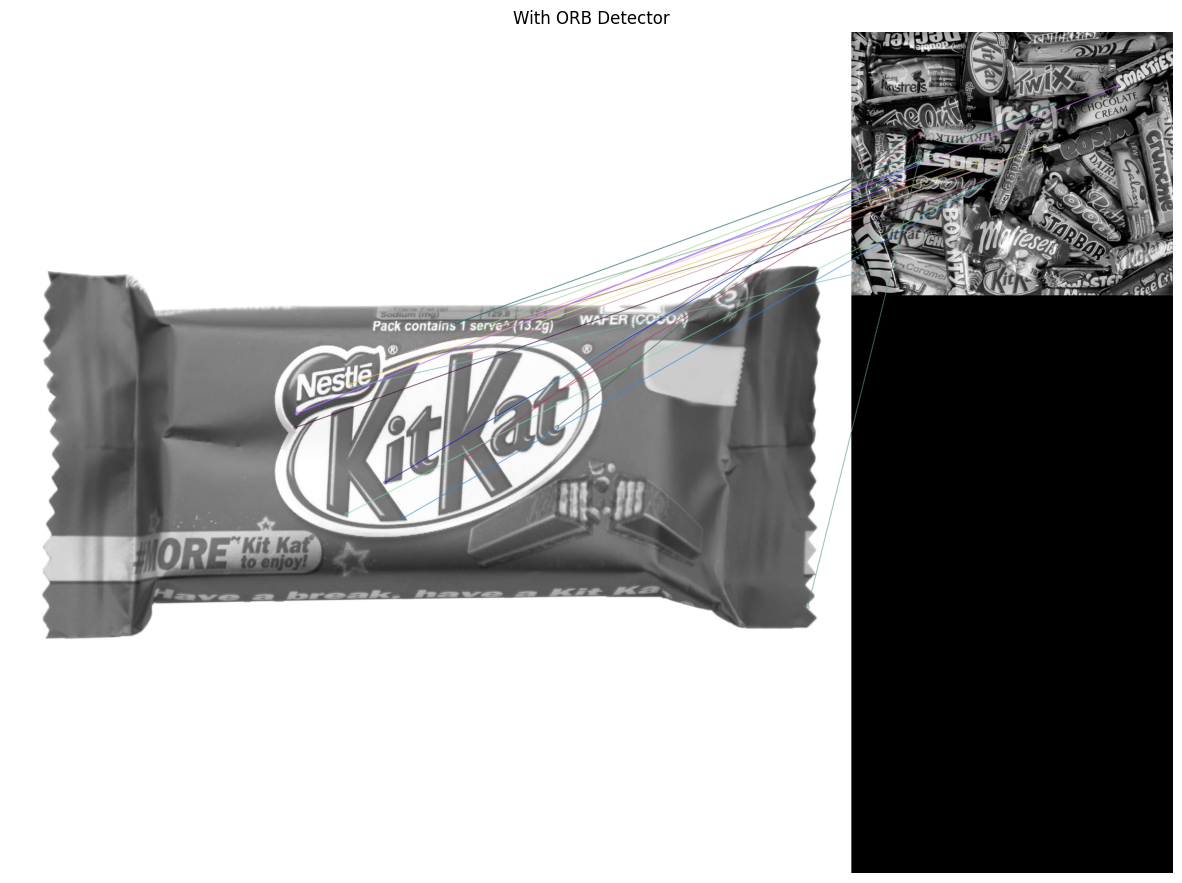

In [6]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# match points
matches = bf.match(des1, des2)

# sort by distance
matches = sorted(matches, key=lambda x: x.distance)

# visualize by matched images
plt.figure(figsize=(15,15))
img_match = cv2.drawMatches(cho,kp1, chos,kp2, matches[:20], None, flags=2)

plt.title("With ORB Detector"), plt.imshow(img_match), plt.axis("off");

In [19]:
pip install opencv-contrib-python --user


   ---------------------------------------- 46.2/46.2 MB 10.1 MB/s eta 0:00:00


### ORB Detector doesn't work well

# SIFT Detector

### pip install opencv-contrib-python --user

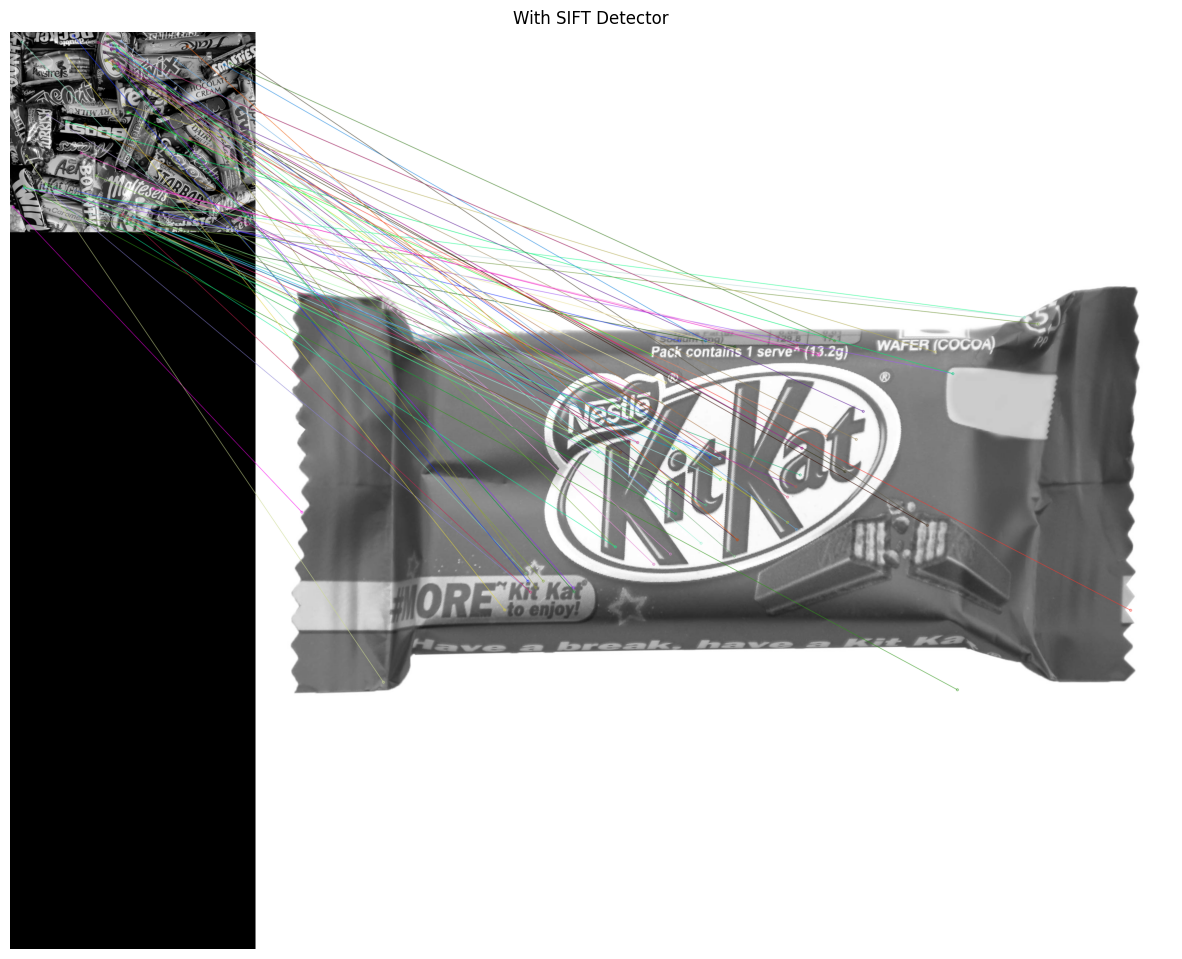

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
cho = cv2.imread("data/chocolates.jpg", cv2.IMREAD_GRAYSCALE)  # Main image
chos = cv2.imread("data/nestle.jpg", cv2.IMREAD_GRAYSCALE)  # Object to detect

# Check if images are loaded properly
if cho is None or chos is None:
    print("Error: One or both images not loaded.")
else:
    # Check if SIFT is available (OpenCV >4.4.0 uses `cv2.SIFT_create()`)
    if hasattr(cv2, 'SIFT_create'):
        sift = cv2.SIFT_create()
    else:
        print("SIFT not available in this OpenCV version.")
        sift = None

    if sift:
        # Brute Force Matcher
        bf = cv2.BFMatcher()

        # Key points detection with SIFT
        kp1, des1 = sift.detectAndCompute(cho, None)
        kp2, des2 = sift.detectAndCompute(chos, None)

        # Ensure descriptors are found before matching
        if des1 is None or des2 is None:
            print("No descriptors found. Try using another detector like ORB.")
        else:
            # KNN Matching
            matches = bf.knnMatch(des1, des2, k=2)

            matched_well = []
            for match1, match2 in matches:
                if match1.distance < 0.75 * match2.distance:
                    matched_well.append([match1])  # Needs to be a list of lists for drawMatchesKnn()

            # Ensure we have enough good matches to display
            if len(matched_well) == 0:
                print("No good matches found.")
            else:
                # Draw matches
                plt.figure(figsize=(15, 15))
                sift_matches = cv2.drawMatchesKnn(
                    img1=cho, keypoints1=kp1, 
                    img2=chos, keypoints2=kp2, 
                    matches1to2=matched_well, 
                    outImg=None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
                )
                plt.title("With SIFT Detector"), plt.imshow(sift_matches), plt.axis("off")
                plt.show()
